In [1]:
%install_ext https://raw.githubusercontent.com/SiggyF/notebooks/master/pep8_magic.py
%load_ext pep8_magic

Installed pep8_magic.py. To use it, type:
  %load_ext pep8_magic


In [2]:
import numpy as np
import matplotlib.pyplot as plt  # for plots
import pandas as pd
from matplotlib import rc
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import sklearn.linear_model as lm
import scipy as sc
from sklearn.utils import resample
import seaborn as sns
import os as macosx
import math
from os import mkdir, path
from IPython.display import display, Math, Latex
macosx.environ['PATH'] = macosx.environ['PATH'] + ':/usr/texbin'


In [3]:
# Plot initialization
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_red = color_blind_list[3]

#Exercice 1 

##Question 1

Nous considérons le modèle linéraire suivant:
$$  \mathbf{y} = \mathbf{X} \mathbf{\theta^*} + \mathbf{\varepsilon} \\
   \begin{align} \mathbf{y} \in \mathbb{R}^n  && \text{est le vecteur des observations} \\
   \mathbf{X} \in \mathbb{R}^{n \times p+1} && \text{est la matrice des variables explicatives} \\
   \mathbf{\theta}^* \in \mathbb{R}^{p+1}  && \text{est le vrai paramètre du modèle que l’on veut 
retrouver} \\
 \mathbf{\varepsilon} \in \mathbb{R}^{n}  && \text{est le bruit dont la loi de distribution est } \mathcal{N}(\mathbf{0}_{n},\sigma^{2}\mathbf{I}_{d_n}) \end{align} $$

##Question 2

Nous chargeons le dataset airquality depuis le module statsmodels:

In [22]:
# Load data
dat = sm.datasets.get_rdataset("airquality").data

In [23]:
dat.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Nous obtenons une description des propriétés statistiques du dataset airquality.
on remarque qu'il y a des données manquantes (notamment pour le vecteur des observations Ozone et pour la variable explicative Solar.R).

In [27]:
# checking dataframe format
dat.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


##Question 3

Nous supprimons les lignes avec des données manquantes via la methode dropna.
il ne reste plus que 111 lines. En conséquence, n= 111 dans notre modèle. Par ailleurs p= 5.

In [28]:
# removing lines with missing values
dat = dat.dropna(axis=0)
dat.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


##Question 4

Nous créons le vecteur des observations y et la matrice des variables explicatives X nécessaires pour effectuer la régression linéaire via le package statmodels:

In [30]:
# creating models
y = dat['Ozone']
X = dat[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
X.head()

,Solar.R,Wind,Temp,Month,Day
0,190,7.4,67,5,1
1,118,8.0,72,5,2
2,149,12.6,74,5,3
3,313,11.5,62,5,4
6,299,8.6,65,5,7


Nous normalisons les données en utisant le module preprocessing de sklearn:

In [31]:
# Normalizing data
scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)
X_scale = sm.add_constant(X_scale, prepend=False)

Nous ajustons le modèle par la méthode des moindres carrés du module statmodels.
$$ \text{les coefficients } \mathbf{\theta_i} \text{ sont stockés dans le vecteur thetas.} $$

In [33]:
mod = sm.OLS(y, X_scale)
res = mod.fit()
thetas = res.params
thetas.index = np.append(X.columns.values, ['Intercept'], axis=0)
print(thetas)

Solar.R       4.561931
Wind        -11.752771
Temp         17.985220
Month        -4.458953
Day           2.373939
Intercept    42.099099
dtype: float64


## Question 5

Un estimateur sans biais de la variance du bruit est donné par la formule suivante:
$$ \hat{\sigma}^2 = \frac{1}{n-rg(X)}  \|y-X\hat{\theta}\|_2^2 $$
On note ici que le rang de X est 5 (les variables ne sont pas liées)
voir le résulat numérique suivant:


In [46]:
# rank of X + 1 (intercept)
rank_X_scale = np.linalg.matrix_rank(X_scale)
print("rang de X: %s" % (rank_X_scale-1))
n = len(X)
residus= y-res.predict(X_scale)
## norme 2 des résidus
norm_residus= np.sqrt(np.dot(residus.transpose(),residus))
hat_sigma= np.sqrt(1.0/(n-rank_X_scale)*norm_residus**2)
display(Math('\hat{\sigma}^2 = %s' % (hat_sigma**2)))


rang de X: 5


<IPython.core.display.Math object>

##Question 6

$$ \text{L'intervalle de confiance est le suivant pour l'estimateur } \hat{\theta}_j \text{ est le suivant: }$$
$$ \Big[ \hat{\theta}_j - t_{1-\alpha/2} \hat{\sigma} \sqrt{(X^T X)^{-1}_{j,j}} \space ; \space  \hat{\theta}_j + t_{1-\alpha/2} \hat{\sigma} \sqrt{(X^T X)^{-1}_{j,j}} \Big]$$ 
$$ \text{où on note } t_{1-\alpha/2} \text{ un quantile d'ordre } 1-\alpha/2 \text{ de la loi de student } T_{n-rg(X)}  $$



In [48]:
df = n - rank_X_scale
alpha = 0.01
# computing student intervals for df and 1-alpha
interval_student = sc.stats.t.interval(1-alpha, df)
inv_of_X_transposeX = np.linalg.inv(np.dot(X_scale.transpose(), X_scale))
sqrt_invXtXjj = np.sqrt(np.diag(inv_of_X_transposeX))
# creating pandas dataframe to store and display intervals
intervals_dict = {'interval_min':
                  thetas - interval_student[1]*hat_sigma*sqrt_invXtXjj,
                  'theta': thetas,
                  'interval_max':
                  thetas + interval_student[1]*hat_sigma*sqrt_invXtXjj}
intervals_df = pd.DataFrame(intervals_dict, index=thetas.index.values)
print(intervals_df)

           interval_max  interval_min      theta
Solar.R       10.136853     -1.012992   4.561931
Wind          -5.764375    -17.741167 -11.752771
Temp          24.801900     11.168540  17.985220
Month          1.364907    -10.282812  -4.458953
Day            7.596628     -2.848751   2.373939
Intercept     47.293030     36.905168  42.099099


##Question 7

On constate que zéro fait partie de l'intervalle de confiance pour les coefficients thetas pour Month et Day.
On ne peut pas conclure que Month et Day sont des variables explicatives.   

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


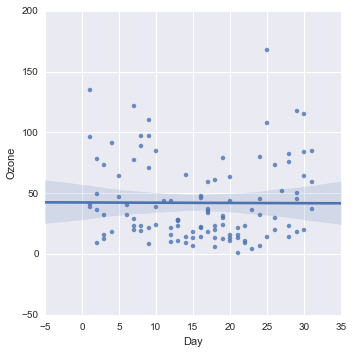

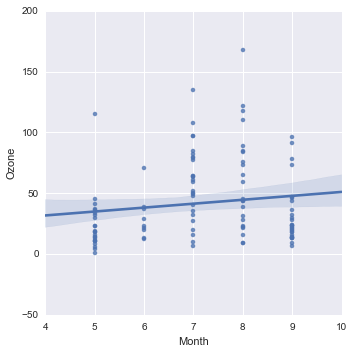

In [49]:
sns.lmplot('Day', 'Ozone', data=dat, fit_reg=True)
sns.lmplot('Month', 'Ozone', data=dat, fit_reg=True)

##Question 8

On enregistre une nouvelle observation (Solar.R=197, Wind=10, Temp=70, Month=3, Day=1,
). La prévision du modèle concernant la concentration en ozone est la suivante:

In [54]:
Xnew = [[197.0, 10.0, 70.0, 3.0, 1.0]]
Xnew_scale = pd.DataFrame(scaler.transform(Xnew))
Xnew_scale = sm.add_constant(Xnew_scale, prepend=False)
ozone = res.predict(Xnew_scale)
print("Prédiction pour ozone = %s" % ozone)

Prédiction pour ozone = [ 36.46233787]


La concentration en ozone obtenue est plus faible que de la concentration moyenne observée dans le dataset. l'observation choisie est elle-même proche pour chaque variable explicative de la moyenne du dataset.

In [55]:
dat.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


#Exercice 2

##Question 1

ce bloc définit deux fonctions:
- la fonction lin_reg_random_sample(i) réalise une régression linéaire sur un data resamplé avec un seed égal à i er retourne les thétas
- la fonction create_thetas_samples_datframe(B) itère sur la fonction précédente est stocke les résulats dans un dictionnaire qui est transformé en dataframe et retourné.

In [56]:
B = 1000
# initializing list to store all samples
# not optimized may be we should have rescale before sampling


def lin_reg_random_sample(i):
    data = resample(dat)
    y = data['Ozone']
    X = data[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
    scaler = preprocessing.StandardScaler().fit(X)
    X_scale = scaler.transform(X)
    X_scale = sm.add_constant(X_scale, prepend=False)
    mod = sm.OLS(y, X_scale)
    res = mod.fit()
    thetas = res.params
    thetas.index = np.append(X.columns.values, ['Intercept'], axis=0)
    return thetas


def create_thetas_samples_dataframe(n):
    df_dict = {}
    for i in range(0, n):
        df_dict.update({i: lin_reg_random_sample(i)})
    return pd.DataFrame(df_dict).transpose()


thetas_samples_df = create_thetas_samples_dataframe(B)
thetas_samples_df.describe()

,Solar.R,Wind,Temp,Month,Day,Intercept
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.559373,-11.818054,17.922497,-4.355304,2.350309,42.274793
std,1.813534,2.954128,2.379746,1.975543,2.165881,3.193137
min,-0.965883,-23.463223,7.098552,-11.288188,-5.197599,33.963964
25%,3.361734,-13.675634,16.341437,-5.593486,0.779523,39.954955
50%,4.618573,-11.664062,17.934308,-4.345722,2.405041,42.360360
75%,5.686042,-9.798060,19.462399,-2.998095,3.882576,44.382883
max,10.143621,-4.105627,24.627999,1.630828,9.099933,52.810811


Nous calculons ici un tableau de comparaison des moyennes et médianes des estimateurs des coefficients obtenus par la méthode bootstrap et la régression linéaire standard. On constate de faibles écarts.

In [58]:
dict = {'moyenne bootstrap': thetas_samples_df.mean(axis=0),
        'mediane bootstrap': thetas_samples_df.median(axis=0),
        'régréssion linéraire': thetas}
df_thetas_compare = pd.DataFrame(dict)
df_thetas_compare

,mediane bootstrap,moyenne bootstrap,régréssion linéraire
Solar.R,4.618573,4.559373,4.561931
Wind,-11.664062,-11.818054,-11.752771
Temp,17.934308,17.922497,17.985220
Month,-4.345722,-4.355304,-4.458953
Day,2.405041,2.350309,2.373939
Intercept,42.360360,42.274793,42.099099


##Question 2

Création de l'intervalle de confiance à 99%.
99% de la masse de la distribution est située entre les quantiles à 0,5% et 99,5%.

In [63]:
df = thetas_samples_df.quantile([0.005, 0.995]).transpose()
df.columns = ['intervalle min', 'intervalle max']
df['mediane bootstrap'] = df_thetas_compare['mediane bootstrap']
df

,intervalle min,intervalle max,mediane bootstrap
Solar.R,0.062102,9.242409,4.618573
Wind,-19.753660,-5.273700,-11.664062
Temp,11.380472,23.346347,17.934308
Month,-9.720357,0.561693,-4.345722
Day,-3.099344,7.897738,2.405041
Intercept,35.071982,50.441712,42.360360


##Question 3

Nous création une fonction compute_interval_wind qui retourner un dataframe avec les intervalles de confiance pour des coefficients de la variable Wind pour B=1..5001

In [73]:
def compute_interval_wind(B):
    dict = {}
    for b in range(1, B+1, 500):
        thetas_samples_df = create_thetas_samples_dataframe(b)
        median_df = thetas_samples_df.median(axis=0)
        df = thetas_samples_df.quantile([0.005, 0.995])
        dict.update({b: {'mediane bootstrap': median_df['Wind'],
                         'borne min': df['Wind'][0.005],
                         'borne max': df['Wind'][0.995]}})
    return pd.DataFrame(dict).transpose()
df = compute_interval_wind(5001)
df

,borne max,borne min,mediane bootstrap
1,-17.705921,-17.705921,-17.705921
501,-5.255376,-20.907945,-11.591307
1001,-5.267997,-19.736541,-11.556565
1501,-5.343603,-20.325873,-11.627871
2001,-4.757120,-20.352159,-11.649485
2501,-5.078172,-19.769212,-11.661775
3001,-5.014992,-20.513921,-11.557850
3501,-4.921956,-20.035750,-11.573070
4001,-4.794213,-19.916555,-11.691200
4501,-4.969767,-20.051724,-11.583371


Création du graphique

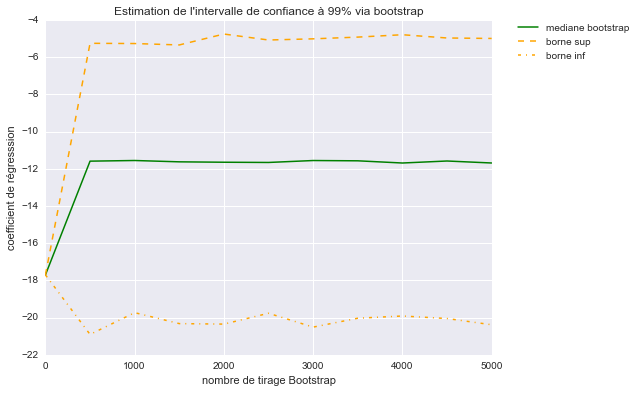

In [74]:
df['Nb Bootstrap'] = df.index.values
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=5002)
plt.ylim(ymin=-22, ymax=-4)

plt.plot(df['Nb Bootstrap'], df['mediane bootstrap'], color='green',
         linewidth=1.5, linestyle="-", label="mediane bootstrap")
plt.plot(df['Nb Bootstrap'], df['borne max'], color='orange',
         linewidth=1.5, linestyle="--", label="borne sup")
plt.plot(df['Nb Bootstrap'], df['borne min'], color='orange',
         linewidth=1.5, linestyle="-.", label="borne inf")

xlabels = 'nombre de tirage Bootstrap'
ylabels = 'coefficient de régresssion'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Estimation de l\'intervalle de confiance à 99% via bootstrap')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##Question 4

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


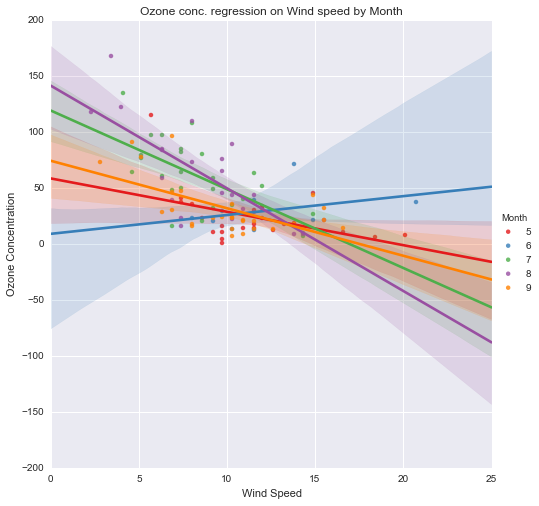

In [75]:
# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(8, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="Wind", y="Ozone", hue="Month", data=dat,
               palette="Set1", size=7)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Wind Speed", "Ozone Concentration")
sns.plt.title('Ozone conc. regression on Wind speed by Month')

Le mois de juin (Month = 6) semble atypique (pente positive)

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


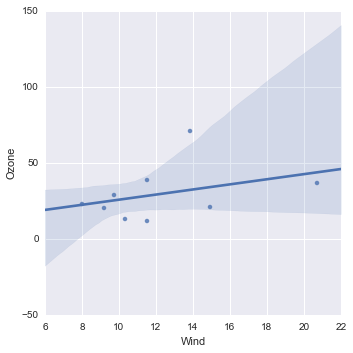

In [76]:
dat_month = dat[dat['Month'] == 6]
sns.lmplot('Wind', 'Ozone', data=dat_month)

## Exercice 3 

##Question 1

Une implementation de l'algorithme stpforward:

In [77]:
def stpforward(X, y, M):
    n, p = X.shape
    thetas = np.zeros(p+1)
    S = []
    r = y
    for i in range(0, M):
        # getting index
        jlist = list(filter(lambda x: x not in S, range(p)))
        S.append(jlist[np.argmax(abs(np.dot(X[:, jlist].transpose(), y)))])
        # performing linear regression
        Xs = X[:, S]
        Xs = sm.add_constant(Xs, prepend=False)
        mod = sm.OLS(y, Xs)
        res = mod.fit()
        thetas_int = res.params
        # update values
        thetas[S] = thetas_int[:-1]
        thetas[-1] = thetas_int[-1]  # const theta0
        r= y - res.predict(Xs)
    return (S, thetas)

un test de l'algorithme pour B=4 sur le dataset:

In [80]:
y = dat['Ozone'].as_matrix()
X = dat[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']].as_matrix()
scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)
S, thetas = stpforward(X_scale, y, 4)
print("S= %s" % S)
print("valeur des coefficients = %s" % thetas)

S= [2, 1, 0, 3]
valeur des coefficients = [  4.50045463 -11.74591966  17.7488752   -4.38806519   0.          42.0990991 ]


##Question 2

une implémentation de la classe MYOMP:

In [83]:
import numpy as np
from sklearn.linear_model.base import LinearModel, _pre_fit
from sklearn.base import RegressorMixin


class MYOMP(LinearModel, RegressorMixin):
    
    
    def __init__(self, n_nonzero_coefs=None, fit_intercept=True,
                 normalize=True, precompute='auto'):
        self.n_nonzero_coefs = n_nonzero_coefs
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.precompute = precompute
        
        
    def stpforward(self, X, y):
        """forward stage-wise selection (ou Orthogonal Matching Mursuit)
        Parameters
        ----------
        X : array-like, shape (n_samples, p_features)
        Training data. expected to be normalized
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        thetas list of regr coefs
        """
        n, p = X.shape
        thetas = np.zeros(p+1)
        S = []
        r = y
        for i in range(0, self.n_nonzero_coefs):
            # getting index
            jlist = list(filter(lambda x: x not in S, range(p)))
            S.append(jlist[np.argmax(abs(np.dot(X[:, jlist].transpose(), y)))])
            # performing linear regression
            Xs = X[:, S]
            Xs = sm.add_constant(Xs, prepend=False)
            mod = sm.OLS(y, Xs)
            res = mod.fit()
            thetas_int = res.params 
            # updating values
            thetas[S] = thetas_int[:-1]
            thetas[-1] = thetas_int[-1]  
            r= y - res.predict(Xs)
        return thetas[:-1]
    
    
    def fit(self, X, y):
        """Fit the model using X, y as training data.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        self : object
        returns an instance of self.
        """
        X, y, X_mean, y_mean, X_std, Gram, Xy = \
        _pre_fit(X, y, None, self.precompute, self.normalize,
                 self.fit_intercept, copy=True)
        self.coef_ = self.stpforward(X, y) 
        self._set_intercept(X_mean, y_mean, X_std)
        return self

test de la classe MYOMP pour M=4:

In [84]:
myomp = MYOMP(n_nonzero_coefs=4)
t = myomp.fit(X_scale, y)
print(t.coef_)

[  4.50045463 -11.74591966  17.7488752   -4.38806519   0.        ]


##Question 4

Comparaison de MYOMP et de OrthogonalMatchingPursuit de sklearn.

In [86]:
def ApplyMyOMP(L):
    R = []
    for i in L:
        omp = MYOMP(n_nonzero_coefs=i)
        omp.fit(X_scale, y)
        R.append(omp.coef_)
    return R

my_omp = np.array(ApplyMyOMP([3, 4, 5]))
my_omp

array([[  5.42816683, -11.80641781,  15.67331326,   0.        ,   0.        ],
       [  4.50045463, -11.74591966,  17.7488752 ,  -4.38806519,   0.        ],
       [  4.56193076, -11.75277084,  17.98521995,  -4.45895297,
          2.37393859]])

In [87]:
def ApplyOrthogonalMatchingPursuit(L):
    R = []
    for i in L:
        omp = lm.OrthogonalMatchingPursuit(i)
        omp.fit(X_scale, y)
        R.append(omp.coef_)
    return R

In [88]:

lm_omp = np.array(ApplyOrthogonalMatchingPursuit([3, 4, 5]))
lm_omp

array([[  5.42816683, -11.80641781,  15.67331326,   0.        ,   0.        ],
       [  4.50045463, -11.74591966,  17.7488752 ,  -4.38806519,   0.        ],
       [  4.56193076, -11.75277084,  17.98521995,  -4.45895297,
          2.37393859]])

In [89]:
print("are results equal ? %s " % np.array_equal(my_omp, lm_omp))
print("are results close ? %s " % np.all(np.isclose(my_omp, lm_omp)))
print("gap (log10): %s" % round(math.log10(np.sum(my_omp - lm_omp))))

are results equal ? False 
are results close ? True 
gap (log10): -13


les sorties de MYOMP sont égales à celle de OrthogonalMatchingPursuit de sklearn à une erreur de précision de 10^-13 près.

##Question 5

Nous utilisons une validation croisée pour choisir le nombre de variables à garder
M en utilisation la fonction cross_val_score de sklearn.
Nous choississons la mean_squared_error comme métrique de scoring.

In [91]:
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error


def argmax_crossvalidation(n_cv):
    list_score = []
    for i in range(1, 6):
        myomp = MYOMP(n_nonzero_coefs=i)
        list_score.append(
            cross_val_score(myomp, X_scale,
                            y, cv=n_cv,
                            scoring='mean_squared_error')).mean()
    return (np.argmax(np.array(list_score))+1)


def crossvalidation(n_cv, i):
    myomp = MYOMP(n_nonzero_coefs=i)
    return cross_val_score(myomp, X_scale, y,
                           cv=n_cv, scoring='mean_squared_error').mean()


def iter_crossvalidation(n_cv, n_iter):
    M = np.repeat(np.arange(1, 6).reshape((1, 5)), n_iter, axis=0)
    g = np.vectorize(lambda x: crossvalidation(n_cv, x))
    return g(M).mean(0)

list(map(lambda x: np.argmax(np.array(iter_crossvalidation(x, 5))) + 1,
         range(3, 11)))

[4, 4, 3, 4, 5, 5, 5, 5]

En testant, la validation, on constate que le nombre de variable choisie n'est pas stable en faisant varier le paramètre K-Fold (ici de 3 à 10) 

In [92]:
iter_crossvalidation(111,1)

array([-578.66612449, -490.87130344, -468.81863405, -458.8890449 ,
       -462.94365618])

En utilisant une methode LOO (leave One Out), c'est un dire un K-Fold avec K = n (111) le nombre total d'observation, on trouve que le nombre un OMP avec 4 variables obtient le meilleur score. Toutefois les valeurs des scores pour M=3, M=4 et M=5 sont proches. 

Comme le dataset est petit et le nombre de variables explicatives sont petits, on se propose d'explorer tous les scores de validation croisée pour k = 2 à 111 (LOO) 

In [93]:
mean_square_error = list(map(lambda x: - max(
            np.array(iter_crossvalidation(x, 1))), range(3, 111)))

In [94]:
arg_max_score = list(map(lambda x: np.argmax(
            np.array(iter_crossvalidation(x, 1)))+1, range(3, 111)))

In [95]:
print(arg_max_score)

[4, 4, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [96]:
def score_crossvalidation(k_fold):
    dict_MSE = {}
    for i in range(2, k_fold+1):
        dict_MSE.update({i: list(
                    map(lambda x: crossvalidation(i, x), range(1, 6)))})
    return pd.DataFrame(dict_MSE).transpose()

df_score = score_crossvalidation(111)

In [97]:
df_score.describe()

,0,1,2,3,4
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-584.981867,-493.851146,-470.006981,-456.327227,-457.971250
std,30.868241,19.943869,17.261248,17.773617,18.064172
min,-706.692856,-576.669076,-533.685694,-523.134491,-542.633805
25%,-597.472684,-502.279584,-476.721969,-462.980560,-464.917894
50%,-588.938884,-496.587624,-471.499584,-458.629085,-460.090104
75%,-578.683079,-486.403257,-464.662069,-450.838516,-452.762811
max,-505.641067,-438.147882,-420.980442,-403.181277,-406.604245


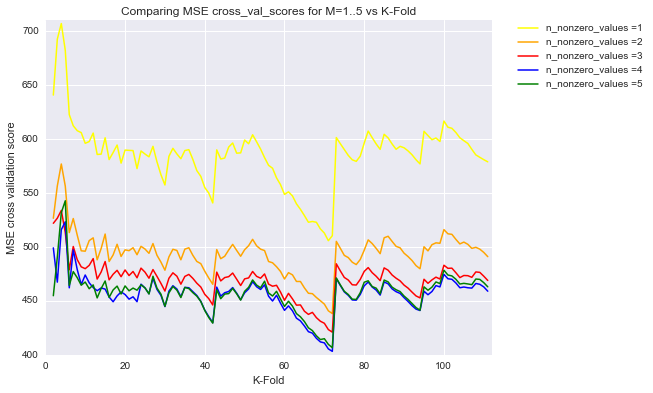

In [101]:
df_score['K-Fold'] = df_score.index.values
df_score.columns = ['n_nonzero_values =1', 'n_nonzero_values =2',
                    'n_nonzero_values =3', 'n_nonzero_values =4',
                    'n_nonzero_values =5', 'K-Fold']

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=112)
plt.ylim(ymin=400, ymax=710)

plt.plot(df_score['K-Fold'], -df_score['n_nonzero_values =1'], color='yellow',
         linewidth=1.5, linestyle="-", label='n_nonzero_values =1')
plt.plot(df_score['K-Fold'], -df_score['n_nonzero_values =2'], color='orange',
         linewidth=1.5, linestyle="-", label='n_nonzero_values =2')
plt.plot(df_score['K-Fold'], -df_score['n_nonzero_values =3'], color='red',
         linewidth=1.5, linestyle="-", label='n_nonzero_values =3')
plt.plot(df_score['K-Fold'], -df_score['n_nonzero_values =4'], color='blue',
         linewidth=1.5, linestyle="-", label='n_nonzero_values =4')
plt.plot(df_score['K-Fold'], -df_score['n_nonzero_values =5'], color='green',
         linewidth=1.5, linestyle="-", label='n_nonzero_values =5')

xlabels = 'K-Fold'
ylabels = 'MSE cross validation score'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Comparing MSE cross_val_scores for M=1..5 vs K-Fold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

On constate sur ce graphique que la différence de préformance entre la sélection de 4 et 5 variables est très faible et qu'on peut être amené à conclure de sélectioner 5 ou 4 variables en fonction du paramètre de K-Fold choisi pour effecter le scoring par validation croisée. 